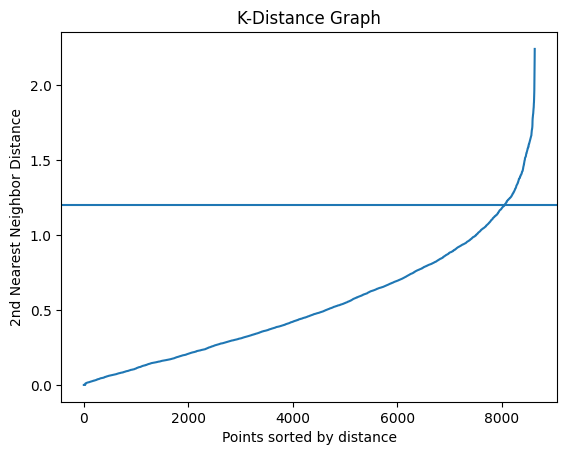

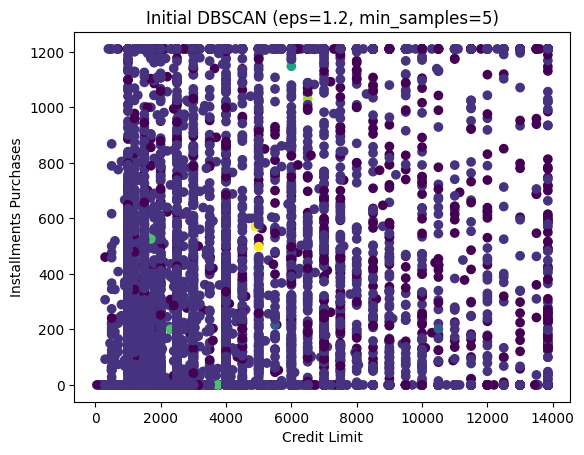

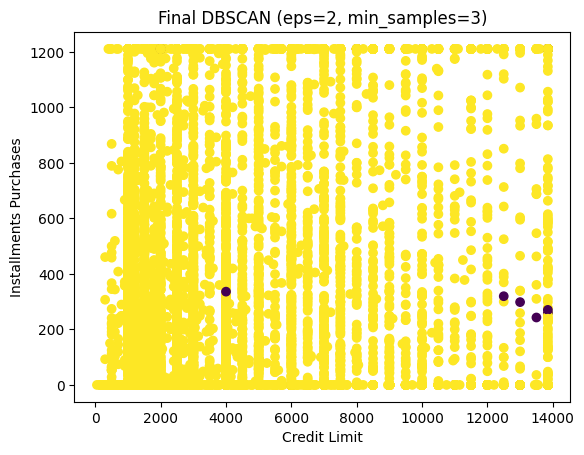

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# ===============================
# 1. Load and Prepare Dataset
# ===============================

# Load dataset
df = pd.read_excel("ML470_S8_Customer_Data_Concept.xlsx")

# Select numerical columns
df_numeric = df.select_dtypes(include=[np.number])

# Standardize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# ===============================
# 2. K-Distance Graph (eps selection)
# ===============================

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

# 2nd nearest neighbor distance
distances = np.sort(distances[:, 1])

plt.figure()
plt.plot(distances)
plt.axhline(y=1.2)
plt.xlabel("Points sorted by distance")
plt.ylabel("2nd Nearest Neighbor Distance")
plt.title("K-Distance Graph")
plt.show()

# ===============================
# 3. Initial DBSCAN Clustering
# ===============================

dbscan_initial = DBSCAN(eps=1.2, min_samples=5)
clusters_initial = dbscan_initial.fit_predict(df_scaled)

plt.figure()
plt.scatter(
    df["credit_limit"],
    df["installments_purchases"],
    c=clusters_initial
)
plt.xlabel("Credit Limit")
plt.ylabel("Installments Purchases")
plt.title("Initial DBSCAN (eps=1.2, min_samples=5)")
plt.show()

# ===============================
# 4. Final DBSCAN Clustering
# ===============================

dbscan_final = DBSCAN(eps=2, min_samples=3)
clusters_final = dbscan_final.fit_predict(df_scaled)

plt.figure()
plt.scatter(
    df["credit_limit"],
    df["installments_purchases"],
    c=clusters_final
)
plt.xlabel("Credit Limit")
plt.ylabel("Installments Purchases")
plt.title("Final DBSCAN (eps=2, min_samples=3)")
plt.show()
